1. Load the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier as eXTremeGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,recall_score

C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\dtale\utils.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



2. Read the data from the dataset

Dataset shape: (100000, 16)

Data types:
 year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

Missing values:
 year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                

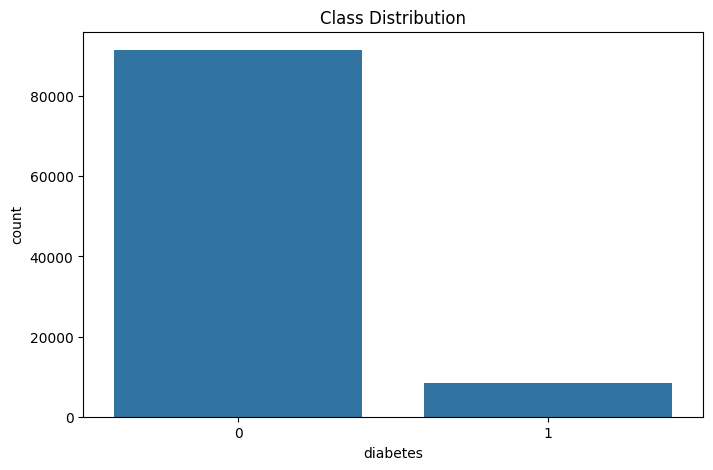

In [2]:
df = pd.read_csv("../../Datasets/diabetes_dataset.csv", encoding='latin1')

print(f"Dataset shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='diabetes', data=df)
plt.title('Class Distribution')
plt.show()

In [3]:
# Drop columns with explanation
cols_to_drop = ['year','location','race:AfricanAmerican','race:Asian',
               'race:Caucasian','race:Hispanic','race:Other']
print(f"Dropping columns: {cols_to_drop} as they are not relevant for prediction")
df.drop(columns=cols_to_drop, inplace=True)


Dropping columns: ['year', 'location', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other'] as they are not relevant for prediction


3. Handling missing values and replacing missing values with nan from numpy and replace with mean of all the other values

In [4]:
print(df.isnull().sum())
print(df.isna().sum())
dtale.show(df)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
# Check unique values in categorical columns
print(df['smoking_history'].unique())
print(df['gender'].unique())  

['never' 'not current' 'current' 'No Info' 'ever' 'former']
['Female' 'Male' 'Other']


In [6]:
print(df['age'].describe())       # Check min/max age
print(df['bmi'].min())            # Check if BMI is 0 or negative

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64
10.01


4. Encoding the categorical data

In [7]:
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender'] = df['gender'].map(gender_mapping)
dtale.show(df)

In [8]:
smoking_mapping = {'never': 0, 'not current': 1, 'current': 2, 
                  'No Info': 3, 'ever': 4, 'former': 5}
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)
dtale.show(df)

5. Feature Engineering

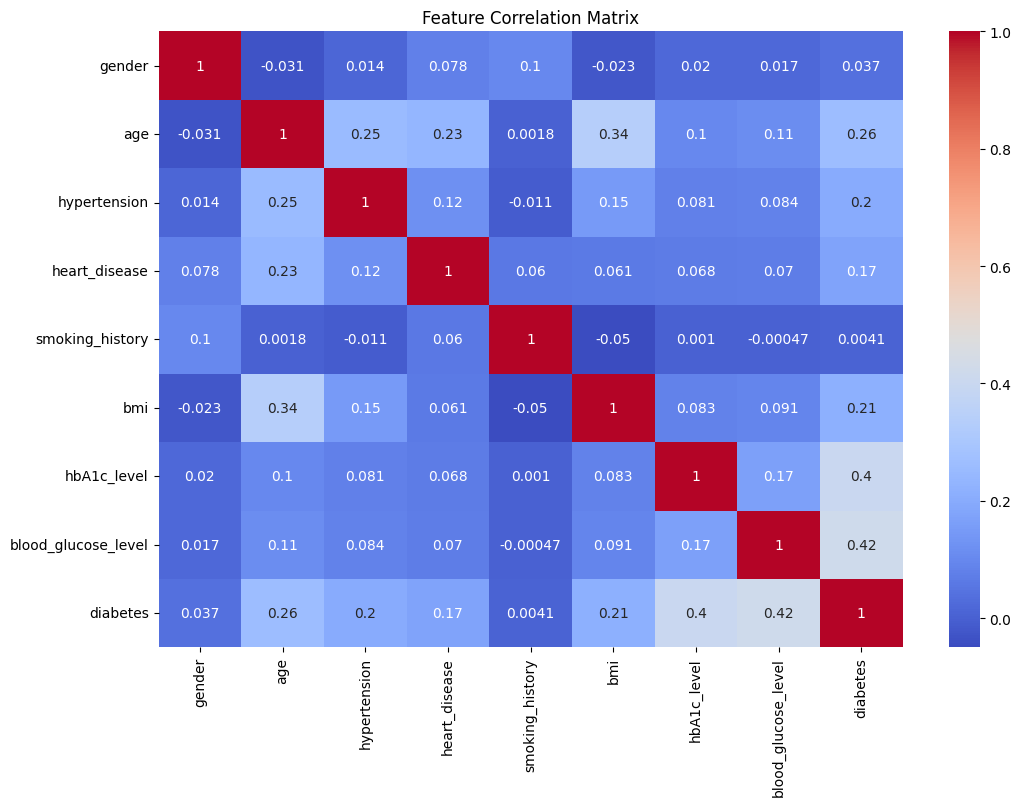

In [9]:
# Add feature correlation analysis
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

6. Split the attribites into dependent and independent attributes

In [10]:
X = df.iloc[:, :-1]  # DataFrame with original column names
Y = df.iloc[:, -1]   # Series with original name
dtale.show(Y, ignore_duplicate=True)

7. Splitting the dataset intro training set and test set

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

8. Train the Extreme Gradient Boost Model

[0]	validation_0-logloss:0.28404
[10]	validation_0-logloss:0.24591
[20]	validation_0-logloss:0.21966
[30]	validation_0-logloss:0.20078
[40]	validation_0-logloss:0.18723
[50]	validation_0-logloss:0.17567
[60]	validation_0-logloss:0.16461
[70]	validation_0-logloss:0.15647
[80]	validation_0-logloss:0.14906
[90]	validation_0-logloss:0.14282
[100]	validation_0-logloss:0.13709
[110]	validation_0-logloss:0.13195
[120]	validation_0-logloss:0.12731
[130]	validation_0-logloss:0.12374
[140]	validation_0-logloss:0.11999
[150]	validation_0-logloss:0.11668
[160]	validation_0-logloss:0.11381
[170]	validation_0-logloss:0.11110
[180]	validation_0-logloss:0.10863
[190]	validation_0-logloss:0.10640
[200]	validation_0-logloss:0.10448
[210]	validation_0-logloss:0.10282
[220]	validation_0-logloss:0.10122
[230]	validation_0-logloss:0.09981
[240]	validation_0-logloss:0.09838
[250]	validation_0-logloss:0.09707
[260]	validation_0-logloss:0.09587
[270]	validation_0-logloss:0.09475
[280]	validation_0-logloss:0.09

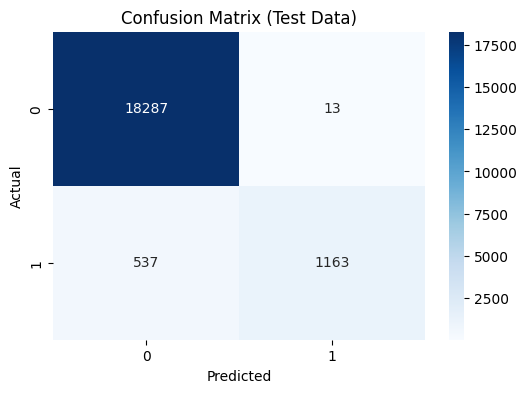

              precision    recall  f1-score     support
0              0.971473  0.999290  0.985185  18300.0000
1              0.988946  0.684118  0.808762   1700.0000
accuracy       0.972500  0.972500  0.972500      0.9725
macro avg      0.980209  0.841704  0.896973  20000.0000
weighted avg   0.972958  0.972500  0.970189  20000.0000


In [12]:
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'logloss',
    'random_state': 42
}
model = eXTremeGradientBoostingClassifier(**xgb_params)
model.fit(X_train, Y_train,
          eval_set=[(X_test, Y_test)],
          verbose=10)

# Display confusion matrix for the model on test data
from sklearn.metrics import confusion_matrix, classification_report
y_pred_train = model.predict(X_test)
cm_train = confusion_matrix(Y_test, y_pred_train)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Display evaluation matrix (classification report)
import pandas as pd
report_train = classification_report(Y_test, y_pred_train, output_dict=True)
df_report_train = pd.DataFrame(report_train).transpose()
print(df_report_train)

9. Retraining the model using Resampled data

In [13]:
smote_enn = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, Y_train_res = smote_enn.fit_resample(X_train, Y_train)
print(pd.Series(Y_train_res).value_counts())

diabetes
1    73200
0    73200
Name: count, dtype: int64


In [14]:
model2 = eXTremeGradientBoostingClassifier(**xgb_params)
model2.fit(X_train_res, Y_train_res) 
Kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_res, Y_train_res, cv=Kfold, scoring='accuracy')

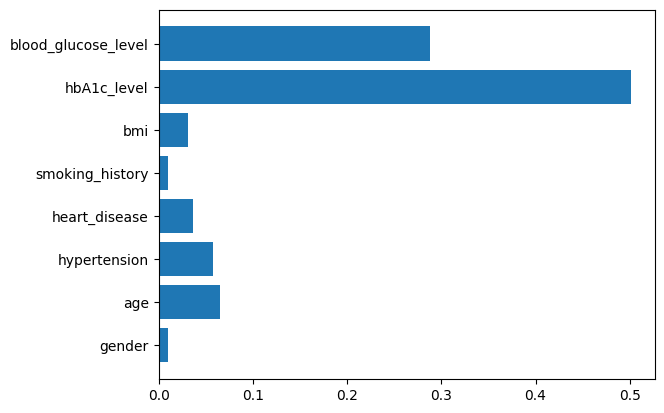

In [15]:
importances = model.feature_importances_
features = df.columns[:-1]
plt.barh(features, importances)
plt.show()

9. Evaluate the retrained model

              precision  recall  f1-score     support
0                0.9758  0.9855    0.9806  18300.0000
1                0.8254  0.7371    0.7787   1700.0000
accuracy         0.9644  0.9644    0.9644      0.9644
macro avg        0.9006  0.8613    0.8797  20000.0000
weighted avg     0.9630  0.9644    0.9635  20000.0000
ROC-AUC: 0.9752
Sensitivity: 0.7371
Specificity: 0.9855
Confusion Matrix:
[[18035   265]
 [  447  1253]]
Mean Accuracy:0.9638 (+/- 0.0013)


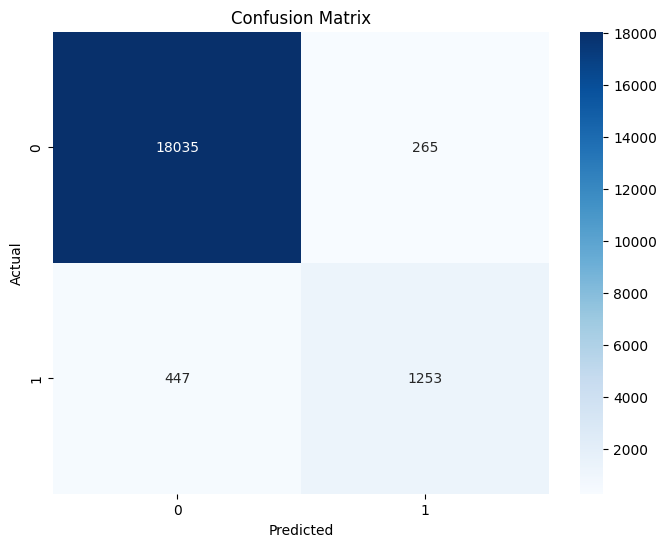

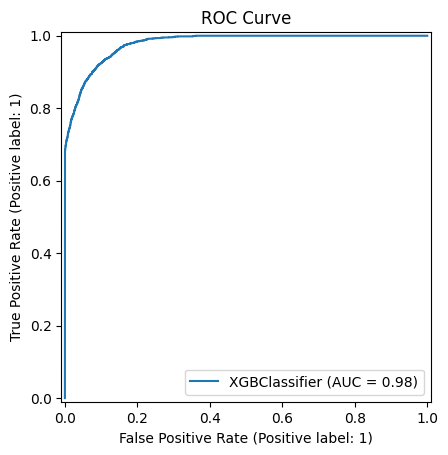

In [16]:
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)[:, 1]
sensitivity = recall_score(Y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_test, y_proba)
cm = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)


report = classification_report(Y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

pd.set_option("display.precision", 4)
print(df_report)
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, y_pred)}")
print(f"Mean Accuracy:{scores.mean():.4f} (+/- {scores.std():.4f})")# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
    
    # Plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.title('ROC Curve')
plt.show()

10. Feature Importance Visualization

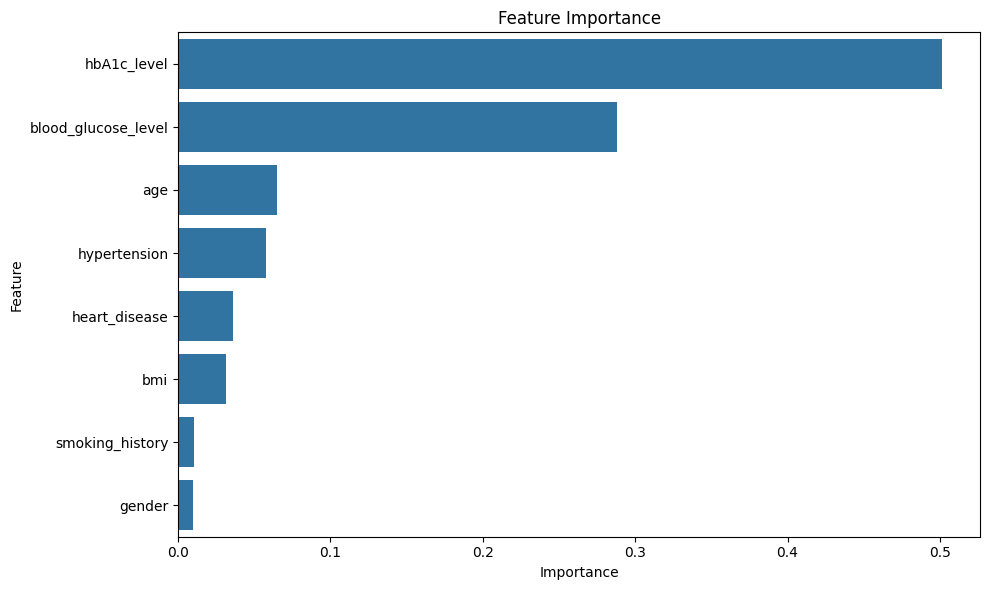

In [17]:
# Feature importance analysis
importance = model.feature_importances_
features = df.columns[:-1]

# Create DataFrame and sort
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

11. Apply Shapley Additive Technique to the data

In [18]:
#get the SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train_res)
print(shap_values.shape)

(146400, 8)


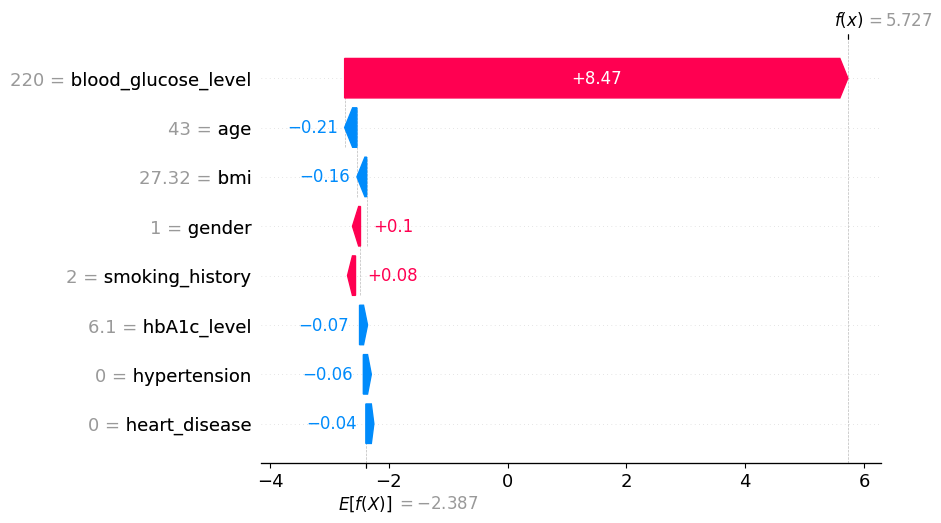

In [19]:
#Waterfall plot for the first observation
shap.plots.waterfall(shap_values[0])

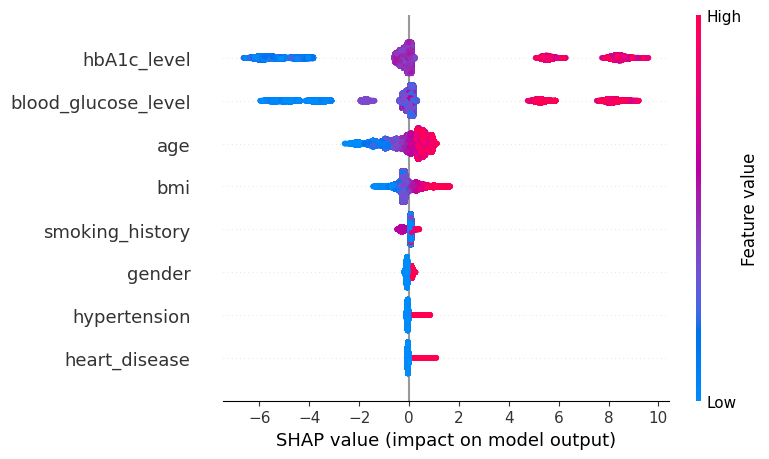

In [20]:
shap.summary_plot(shap_values, X_train_res)